In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load dataset 
df = pd.read_csv('eq2015.csv')

# Display the first few rows of the dataset
display(df.head())

# Summary statistics of the dataset
display(df.describe())

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,...,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,condition_post_eq,damage_grade,technical_solution_proposed,superstructure
0,120101000011,12,1207,120703,1,1,9,288,9,9,...,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Used in risk,Grade 3,Major repair,has_superstructure_mud_mortar_stone
1,120101000021,12,1207,120703,1,1,15,364,9,9,...,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Repaired and used,Grade 5,Reconstruction,has_superstructure_mud_mortar_stone
2,120101000031,12,1207,120703,1,1,20,384,9,9,...,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Repaired and used,Grade 2,Minor repair,has_superstructure_mud_mortar_stone
3,120101000041,12,1207,120703,1,1,20,312,9,9,...,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Repaired and used,Grade 2,Minor repair,has_superstructure_mud_mortar_stone
4,120101000051,12,1207,120703,1,1,30,308,9,9,...,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Repaired and used,Grade 1,Minor repair,has_superstructure_mud_mortar_stone


,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq
count,7.621060e+05,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000
mean,2.607514e+11,25.767835,2582.688357,258274.277335,2.087783,1.252058,24.326405,406.672576,16.049372,9.868817
std,5.801855e+10,5.807555,581.172767,58117.348412,0.655101,1.063275,65.043704,226.779371,5.493878,8.574169
min,1.201010e+11,12.000000,1201.000000,120101.000000,1.000000,0.000000,0.000000,70.000000,6.000000,0.000000
25%,2.219090e+11,22.000000,2204.000000,220402.000000,2.000000,0.000000,9.000000,280.000000,12.000000,0.000000
50%,2.463020e+11,24.000000,2410.000000,241004.000000,2.000000,1.000000,16.000000,358.000000,16.000000,11.000000
75%,3.036080e+11,30.000000,3010.000000,301006.000000,2.000000,2.000000,27.000000,470.000000,18.000000,16.000000
max,3.667090e+11,36.000000,3611.000000,361108.000000,9.000000,9.000000,999.000000,5000.000000,99.000000,99.000000


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762106 entries, 0 to 762105
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   building_id                  762106 non-null  int64 
 1   district_id                  762106 non-null  int64 
 2   vdcmun_id                    762106 non-null  int64 
 3   ward_id                      762106 non-null  int64 
 4   count_floors_pre_eq          762106 non-null  int64 
 5   count_floors_post_eq         762106 non-null  int64 
 6   age_building                 762106 non-null  int64 
 7   plinth_area_sq_ft            762106 non-null  int64 
 8   height_ft_pre_eq             762106 non-null  int64 
 9   height_ft_post_eq            762106 non-null  int64 
 10  land_surface_condition       762106 non-null  object
 11  foundation_type              762106 non-null  object
 12  roof_type                    762106 non-null  object
 13  ground_floor_t

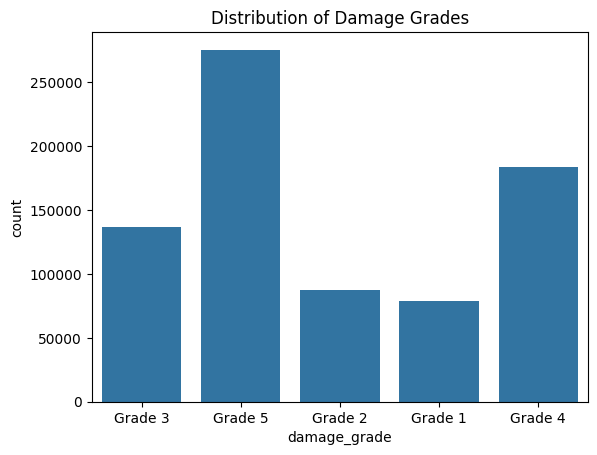

In [3]:
# Distribution of the target variable 'damage_grade'
sns.countplot(x='damage_grade', data=df)
plt.title('Distribution of Damage Grades')
plt.show()

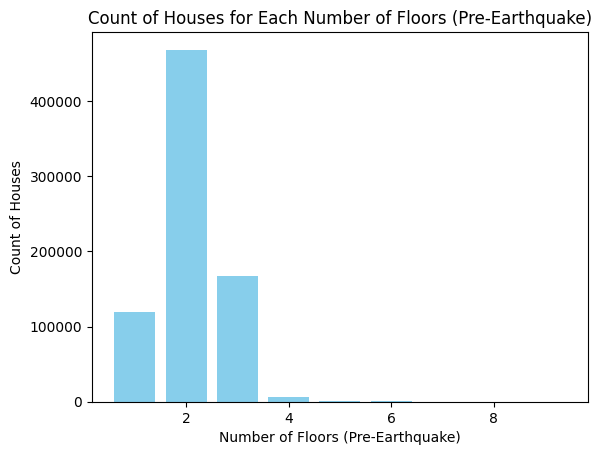

In [4]:
# Count the number of houses for each number of floors
floor_counts = df['count_floors_pre_eq'].value_counts()

# Sort the floors in ascending order
floor_counts = floor_counts.sort_index()

# Create a bar graph
plt.bar(floor_counts.index, floor_counts.values, color='skyblue')

# Add labels and title
plt.xlabel('Number of Floors (Pre-Earthquake)')
plt.ylabel('Count of Houses')
plt.title('Count of Houses for Each Number of Floors (Pre-Earthquake)')

# Display the bar graph
plt.show()


# Here there is a bias for floor 2
so lets go with ostrich theorem for 200000 houses

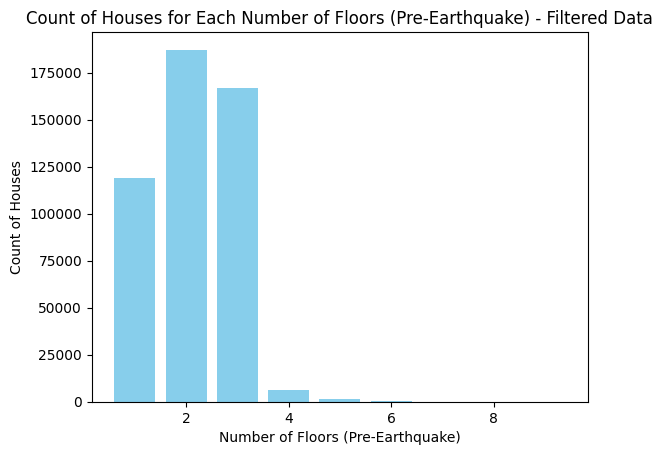

In [5]:

# Identify rows with 2 floors before the earthquake
floor_2_rows = df[df['count_floors_pre_eq'] == 2]

# Randomly sample approximately 60% of the identified rows
sampled_rows = floor_2_rows.sample(frac=0.6, random_state=42)

# Exclude the sampled rows from the original dataset
filtered_df = df.drop(sampled_rows.index)

# filtered_df is the filtered dataset

# Count the number of houses for each number of floors in the filtered dataset
filtered_floor_counts = filtered_df['count_floors_pre_eq'].value_counts()

# Sort the floors in ascending order
filtered_floor_counts = filtered_floor_counts.sort_index()

# Create a bar graph
plt.bar(filtered_floor_counts.index, filtered_floor_counts.values, color='skyblue')

# Add labels and title
plt.xlabel('Number of Floors (Pre-Earthquake)')
plt.ylabel('Count of Houses')
plt.title('Count of Houses for Each Number of Floors (Pre-Earthquake) - Filtered Data')

# Display the bar graph
plt.show()


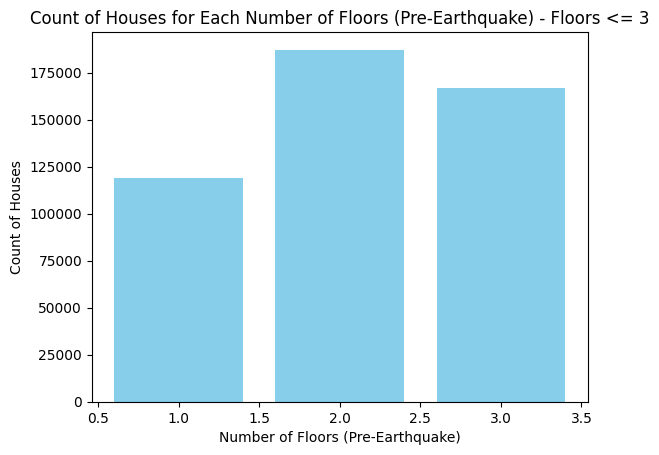

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,...,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,condition_post_eq,damage_grade,technical_solution_proposed,superstructure
0,120101000011,12,1207,120703,1,1,9,288,9,9,...,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Used in risk,Grade 3,Major repair,has_superstructure_mud_mortar_stone
1,120101000021,12,1207,120703,1,1,15,364,9,9,...,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Repaired and used,Grade 5,Reconstruction,has_superstructure_mud_mortar_stone
2,120101000031,12,1207,120703,1,1,20,384,9,9,...,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Repaired and used,Grade 2,Minor repair,has_superstructure_mud_mortar_stone
3,120101000041,12,1207,120703,1,1,20,312,9,9,...,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Repaired and used,Grade 2,Minor repair,has_superstructure_mud_mortar_stone
4,120101000051,12,1207,120703,1,1,30,308,9,9,...,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Repaired and used,Grade 1,Minor repair,has_superstructure_mud_mortar_stone


In [6]:
import matplotlib.pyplot as plt

# Omit houses with floors greater than 3
filtered_df = filtered_df[filtered_df['count_floors_pre_eq'] <= 3]

# Count the number of houses for each number of floors in the filtered dataset
filtered_floor_counts = filtered_df['count_floors_pre_eq'].value_counts()

# Sort the floors in ascending order
filtered_floor_counts = filtered_floor_counts.sort_index()

# Create a bar graph
plt.bar(filtered_floor_counts.index, filtered_floor_counts.values, color='skyblue')

# Add labels and title
plt.xlabel('Number of Floors (Pre-Earthquake)')
plt.ylabel('Count of Houses')
plt.title('Count of Houses for Each Number of Floors (Pre-Earthquake) - Floors <= 3')

# Display the bar graph
plt.show()
filtered_df.head()


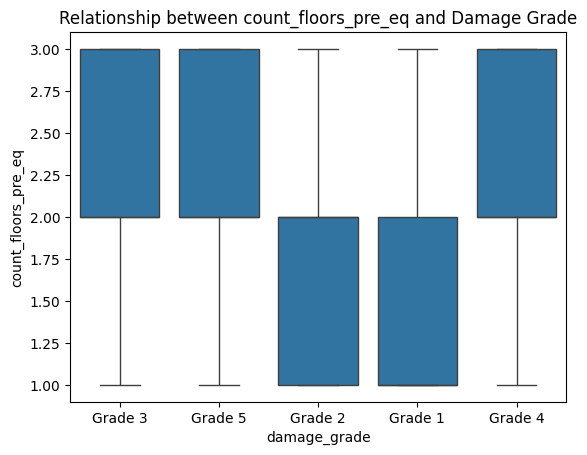

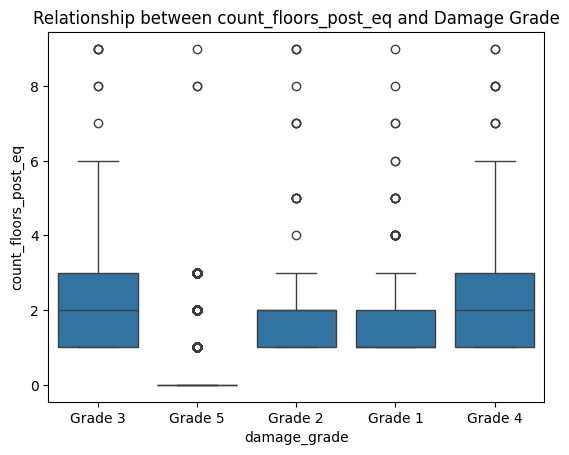

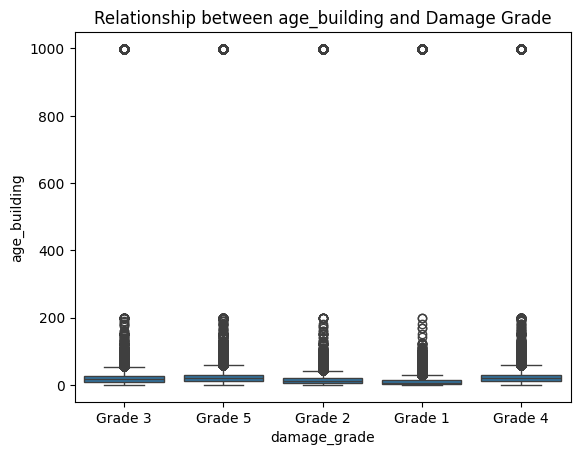

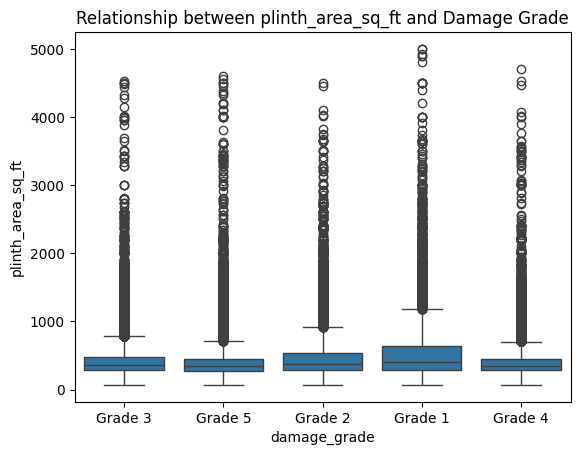

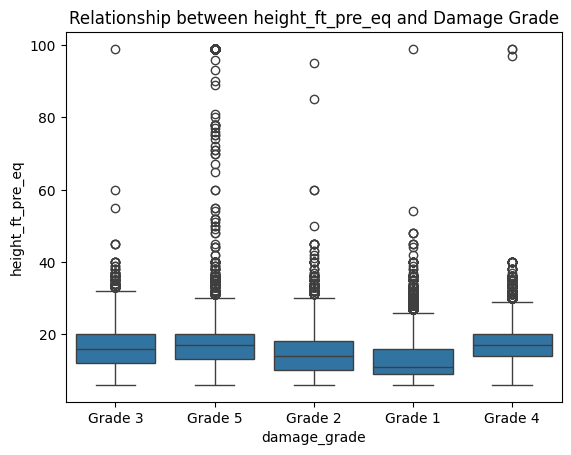

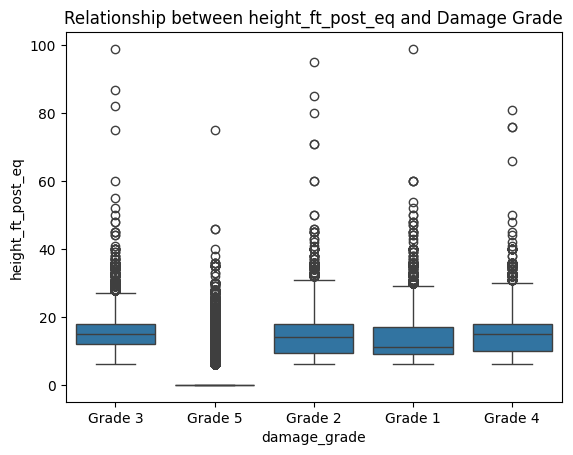

In [7]:

# Explore the relationship between numeric features and damage grade
numeric_features = ['count_floors_pre_eq', 'count_floors_post_eq', 'age_building', 'plinth_area_sq_ft', 'height_ft_pre_eq', 'height_ft_post_eq']
for feature in numeric_features:
    sns.boxplot(x='damage_grade', y=feature, data=filtered_df)
    plt.title(f'Relationship between {feature} and Damage Grade')
    plt.show()

In [8]:
# categorical features
categorical_features = ['land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration']

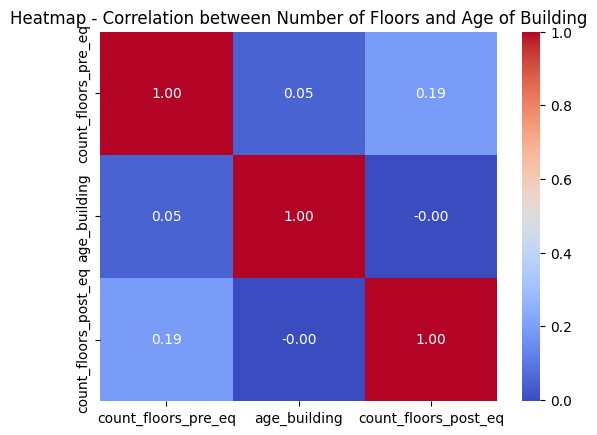

In [27]:
filtered_df = df[df['count_floors_pre_eq'] <= 3]

# Create a heatmap
sns.heatmap(filtered_df[['count_floors_pre_eq', 
                         'age_building', 
                         'count_floors_post_eq']].corr(), 
            annot=True, 
            cmap='coolwarm', 
            fmt=".2f")

# Add title
plt.title('Heatmap - Correlation between Number of Floors and Age of Building')

# Display the heatmap
plt.show()


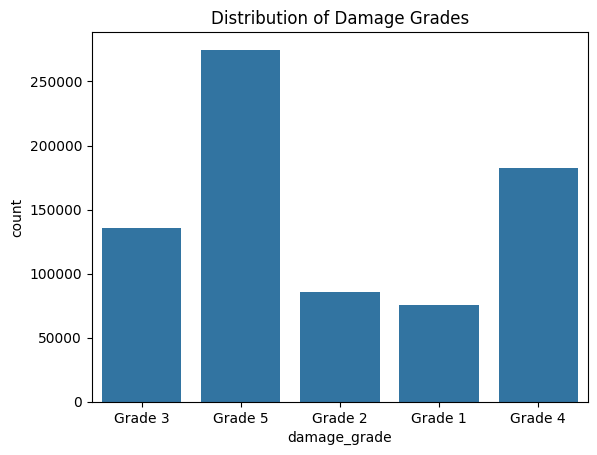

In [30]:
# Distribution of the target variable 'damage_grade'
sns.countplot(x='damage_grade', data=filtered_df)
plt.title('Distribution of Damage Grades')
plt.show()

In [31]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 754007 entries, 0 to 762105
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   building_id                  754007 non-null  int64 
 1   district_id                  754007 non-null  int64 
 2   vdcmun_id                    754007 non-null  int64 
 3   ward_id                      754007 non-null  int64 
 4   count_floors_pre_eq          754007 non-null  int64 
 5   count_floors_post_eq         754007 non-null  int64 
 6   age_building                 754007 non-null  int64 
 7   plinth_area_sq_ft            754007 non-null  int64 
 8   height_ft_pre_eq             754007 non-null  int64 
 9   height_ft_post_eq            754007 non-null  int64 
 10  land_surface_condition       754007 non-null  object
 11  foundation_type              754007 non-null  object
 12  roof_type                    754007 non-null  object
 13  ground_floor_type  